In [1]:
print("Iniciando Análisis de Alura Store Latam")
!python --version

Iniciando Análisis de Alura Store Latam
Python 3.12.12


In [2]:
#librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#mejores visualizaciones
plt.style.use('ggplot')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [3]:
# 4 archivos CSV desde GitHub
print("Cargando datos...")

urls = {
    'tienda_1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'tienda_2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'tienda_3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'tienda_4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Cargar cada tienda en un DataFrame separado
tienda1 = pd.read_csv(urls['tienda_1'])
tienda2 = pd.read_csv(urls['tienda_2'])
tienda3 = pd.read_csv(urls['tienda_3'])
tienda4 = pd.read_csv(urls['tienda_4'])

print(f"Datos cargados:")
print(f"Tienda 1: {len(tienda1)} registros")
print(f"Tienda 2: {len(tienda2)} registros")
print(f"Tienda 3: {len(tienda3)} registros")
print(f"Tienda 4: {len(tienda4)} registros")

Cargando datos...
Datos cargados:
Tienda 1: 2359 registros
Tienda 2: 2359 registros
Tienda 3: 2359 registros
Tienda 4: 2358 registros


In [4]:
#DataFrame único con todos los datos
print(" Unificando todas las tiendas...")

#Añadir columna de identificación de tienda
tienda1['Tienda'] = 'Tienda_1'
tienda2['Tienda'] = 'Tienda_2'
tienda3['Tienda'] = 'Tienda_3'
tienda4['Tienda'] = 'Tienda_4'

#Concatenar todos los DataFrames
ventas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

print(f"Total de registros unificados: {len(ventas)}")
print("\nPrimeros 5 registros:")
ventas.head()

 Unificando todas las tiendas...
Total de registros unificados: 9435

Primeros 5 registros:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1


In [6]:
#estructura de los datos
print("INFORMACIÓN DEL DATASET COMPLETO")
print("="*50)
print("\nColumnas disponibles:")
print(ventas.columns.tolist())

print("\nTipos de datos:")
print(ventas.dtypes)

print("\nEstadísticas descriptivas:")
ventas.describe()

INFORMACIÓN DEL DATASET COMPLETO

Columnas disponibles:
['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']

Tipos de datos:
Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fecha de Compra            object
Vendedor                   object
Lugar de Compra            object
Calificación                int64
Método de pago             object
Cantidad de cuotas          int64
lat                       float64
lon                       float64
Tienda                     object
dtype: object

Estadísticas descriptivas:


,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


ANÁLISIS DE FACTURACIÓN POR TIENDA

RESULTADOS:
  Tienda  Facturación Total  Ticket Promedio  Cantidad Ventas  Facturación Total (Millones)
Tienda_1       1150880400.0    487867.910131             2359                     1150.8804
Tienda_2       1116343500.0    473227.426876             2359                     1116.3435
Tienda_3       1098019600.0    465459.771089             2359                     1098.0196
Tienda_4       1038375700.0    440362.892282             2358                     1038.3757

Tienda con MAYOR facturación: Tienda_1
   Facturación: $1,150,880,400
   Ticket promedio: $487,868
   Ventas totales: 2359


/tmp/ipython-input-3971143337.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Facturación Total (Millones)', data=facturacion, palette='viridis')


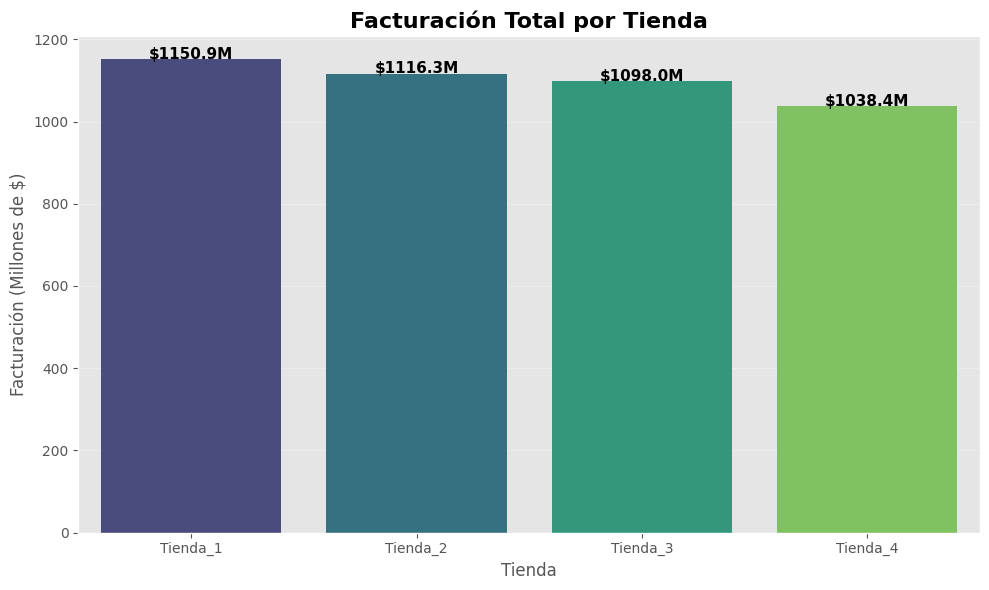

In [7]:
#ANÁLISIS DE FACTURACIÓN
print("ANÁLISIS DE FACTURACIÓN POR TIENDA")
print("="*50)

# Calcular facturación total por tienda
facturacion = ventas.groupby('Tienda')['Precio'].agg(['sum', 'mean', 'count']).reset_index()
facturacion.columns = ['Tienda', 'Facturación Total', 'Ticket Promedio', 'Cantidad Ventas']
facturacion['Facturación Total (Millones)'] = facturacion['Facturación Total'] / 1_000_000

print("\nRESULTADOS:")
print(facturacion.to_string(index=False))

# Identificar tienda con mayor facturación
tienda_top = facturacion.loc[facturacion['Facturación Total'].idxmax()]
print(f"\nTienda con MAYOR facturación: {tienda_top['Tienda']}")
print(f"   Facturación: ${tienda_top['Facturación Total']:,.0f}")
print(f"   Ticket promedio: ${tienda_top['Ticket Promedio']:,.0f}")
print(f"   Ventas totales: {tienda_top['Cantidad Ventas']}")

# Gráfico de facturación
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Tienda', y='Facturación Total (Millones)', data=facturacion, palette='viridis')

# Añadir valores en las barras
for i, v in enumerate(facturacion['Facturación Total (Millones)']):
    ax.text(i, v + 0.5, f'${v:.1f}M', ha='center', fontsize=11, fontweight='bold')

plt.title('Facturación Total por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación (Millones de $)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

ANÁLISIS DE VENTAS POR CATEGORÍA

DISTRIBUCIÓN DE VENTAS POR CATEGORÍA:
              Categoría  Cantidad de Ventas  Porcentaje
                Muebles                1886       19.99
           Electrónicos                1772       18.78
               Juguetes                1290       13.67
      Electrodomésticos                1149       12.18
   Deportes y diversión                1113       11.80
 Instrumentos musicales                 753        7.98
                 Libros                 742        7.86
Artículos para el hogar                 730        7.74

Categoría MÁS VENDIDA: Muebles
   Ventas: 1886 (19.99% del total)


/tmp/ipython-input-4134213407.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Categoría', x='Cantidad de Ventas', data=categorias, palette='magma')


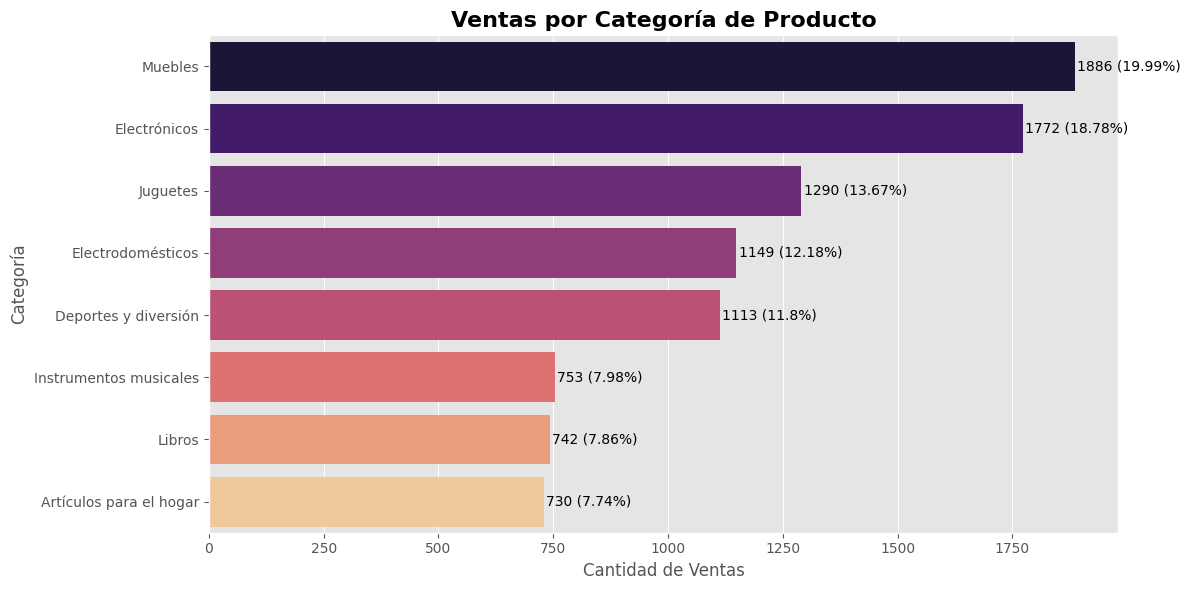

In [8]:
#ANÁLISIS DE VENTAS POR CATEGORÍA
print("ANÁLISIS DE VENTAS POR CATEGORÍA")
print("="*50)

# Calcular ventas por categoría
categorias = ventas['Categoría del Producto'].value_counts().reset_index()
categorias.columns = ['Categoría', 'Cantidad de Ventas']
categorias['Porcentaje'] = (categorias['Cantidad de Ventas'] / categorias['Cantidad de Ventas'].sum() * 100).round(2)

print("\nDISTRIBUCIÓN DE VENTAS POR CATEGORÍA:")
print(categorias.to_string(index=False))

# Categoría más vendida
cat_top = categorias.iloc[0]
print(f"\nCategoría MÁS VENDIDA: {cat_top['Categoría']}")
print(f"   Ventas: {cat_top['Cantidad de Ventas']} ({cat_top['Porcentaje']}% del total)")

# Gráfico de barras horizontales
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='Categoría', x='Cantidad de Ventas', data=categorias, palette='magma')

# Añadir valores
for i, (_, row) in enumerate(categorias.iterrows()):
    ax.text(row['Cantidad de Ventas'] + 5, i, f'{row["Cantidad de Ventas"]} ({row["Porcentaje"]}%)',
            va='center', fontsize=10)

plt.title('Ventas por Categoría de Producto', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Ventas', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.tight_layout()
plt.show()

ANÁLISIS DE CALIFICACIONES

Calificación promedio GENERAL: 4.01 / 5.0

📈 CALIFICACIONES POR TIENDA:
  Tienda  Promedio  Mediana  Desviación
Tienda_1      3.98      5.0        1.42
Tienda_2      4.04      5.0        1.36
Tienda_3      4.05      5.0        1.39
Tienda_4      4.00      5.0        1.40


/tmp/ipython-input-184311622.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Promedio', data=calif_tienda, palette='coolwarm')


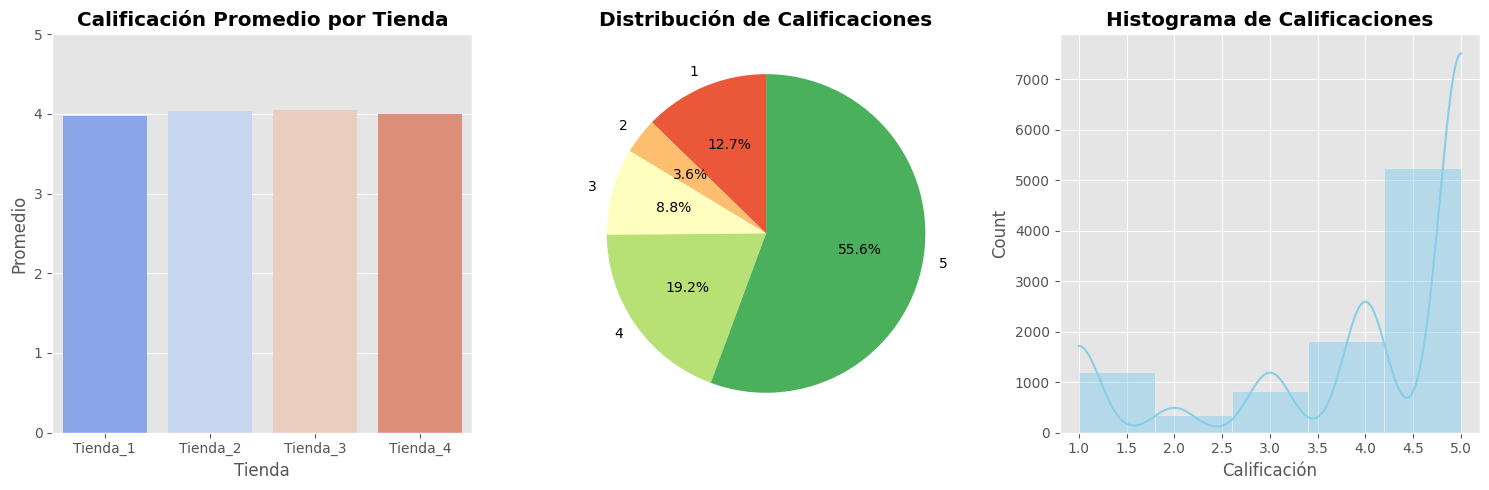

In [10]:
#ANÁLISIS DE CALIFICACIONES
print("ANÁLISIS DE CALIFICACIONES")
print("="*50)

#Calificación promedio general
calif_general = ventas['Calificación'].mean()
print(f"\nCalificación promedio GENERAL: {calif_general:.2f} / 5.0")

#Calificación por tienda
calif_tienda = ventas.groupby('Tienda')['Calificación'].agg(['mean', 'median', 'std']).reset_index()
calif_tienda.columns = ['Tienda', 'Promedio', 'Mediana', 'Desviación']
calif_tienda = calif_tienda.round(2)

print("\n📈 CALIFICACIONES POR TIENDA:")
print(calif_tienda.to_string(index=False))

#Distribución de calificaciones
plt.figure(figsize=(15, 5))

#Gráfico 1: Promedio por tienda
plt.subplot(1, 3, 1)
sns.barplot(x='Tienda', y='Promedio', data=calif_tienda, palette='coolwarm')
plt.title('Calificación Promedio por Tienda', fontweight='bold')
plt.ylabel('Promedio')
plt.ylim(0, 5)

#Gráfico 2: Distribución de calificaciones
plt.subplot(1, 3, 2)
calificaciones_count = ventas['Calificación'].value_counts().sort_index()
plt.pie(calificaciones_count.values, labels=calificaciones_count.index, autopct='%1.1f%%',
        colors=sns.color_palette('RdYlGn', 5), startangle=90)
plt.title('Distribución de Calificaciones', fontweight='bold')

#Gráfico 3: Histograma de calificaciones
plt.subplot(1, 3, 3)
sns.histplot(data=ventas, x='Calificación', bins=5, kde=True, color='skyblue')
plt.title('Histograma de Calificaciones', fontweight='bold')
plt.xlabel('Calificación')

plt.tight_layout()
plt.show()

ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS

TOP 10 PRODUCTOS MÁS VENDIDOS:
   1. Mesa de noche: 210 ventas
   2. Carrito de control remoto: 206 ventas
   3. Microondas: 206 ventas
   4. Batería: 203 ventas
   5. Cama king: 201 ventas
   6. Secadora de ropa: 200 ventas
   7. Modelado predictivo: 200 ventas
   8. Set de ollas: 200 ventas
   9. Cama box: 199 ventas
   10. Bloques de construcción: 199 ventas

📉 TOP 10 PRODUCTOS MENOS VENDIDOS:
   1. Olla de presión: 172 ventas
   2. Smartwatch: 172 ventas
   3. Set de vasos: 169 ventas
   4. Sillón: 168 ventas
   5. Asistente virtual: 167 ventas
   6. Ciencia de datos con Python: 166 ventas
   7. Guitarra eléctrica: 165 ventas
   8. Mochila: 163 ventas
   9. Auriculares con micrófono: 158 ventas
   10. Celular ABXY: 157 ventas


/tmp/ipython-input-3480410248.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Producto', x='Cantidad de Ventas', data=top_10, palette='crest')
/tmp/ipython-input-3480410248.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Producto', x='Cantidad de Ventas', data=bottom_10, palette='flare')


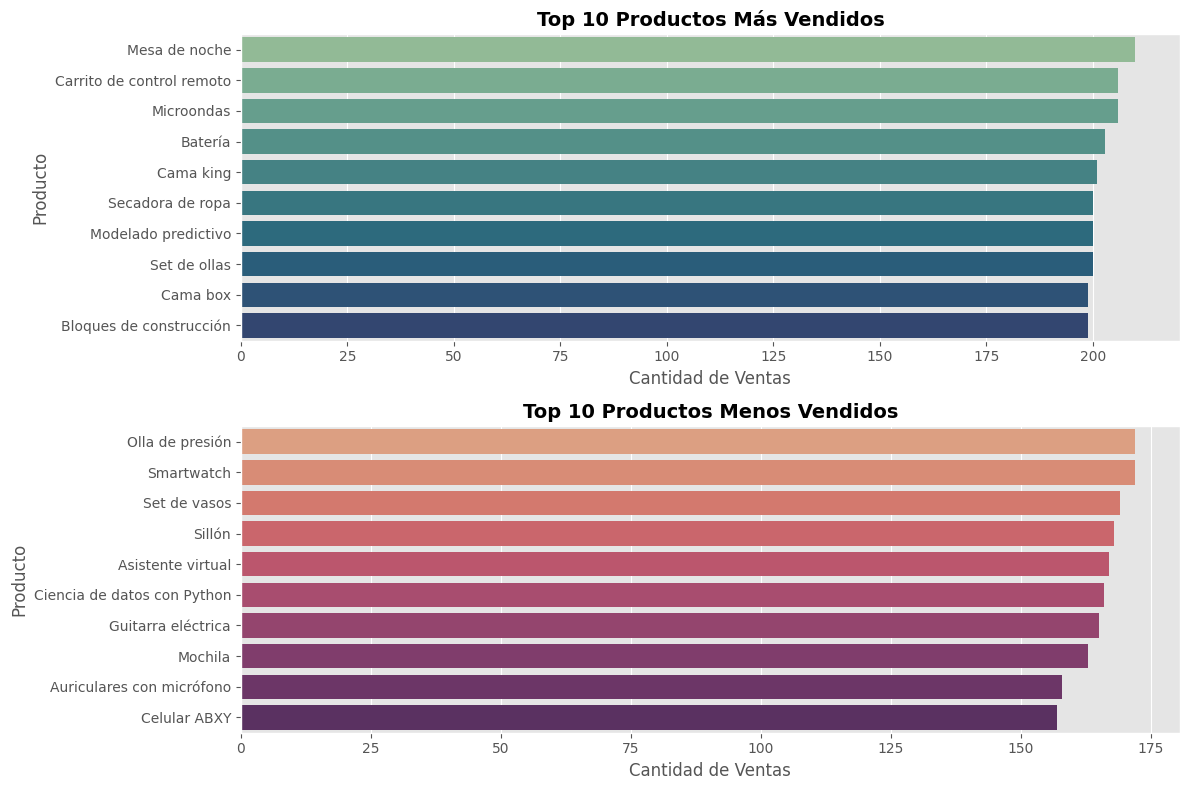

In [11]:
#ANÁLISIS DE PRODUCTOS
print("ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS")
print("="*50)

#ventas por producto
productos = ventas['Producto'].value_counts().reset_index()
productos.columns = ['Producto', 'Cantidad de Ventas']

#Top 10 más vendidos
top_10 = productos.head(10)
print("\nTOP 10 PRODUCTOS MÁS VENDIDOS:")
for i, (_, row) in enumerate(top_10.iterrows(), 1):
    print(f"   {i}. {row['Producto']}: {row['Cantidad de Ventas']} ventas")

#Top 10 menos vendidos
bottom_10 = productos.tail(10)
print("\n📉 TOP 10 PRODUCTOS MENOS VENDIDOS:")
for i, (_, row) in enumerate(bottom_10.iterrows(), 1):
    print(f"   {i}. {row['Producto']}: {row['Cantidad de Ventas']} ventas")

#Gráfico Top 10
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.barplot(y='Producto', x='Cantidad de Ventas', data=top_10, palette='crest')
plt.title('Top 10 Productos Más Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ventas')

plt.subplot(2, 1, 2)
sns.barplot(y='Producto', x='Cantidad de Ventas', data=bottom_10, palette='flare')
plt.title('Top 10 Productos Menos Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Cantidad de Ventas')

plt.tight_layout()
plt.show()

ANÁLISIS DE COSTO DE ENVÍO

Costo de envío promedio GENERAL: $24,875.15

COSTO DE ENVÍO POR TIENDA:
  Tienda  Promedio  Mediana   Máximo
Tienda_1  26018.61  12400.0 160800.0
Tienda_2  25216.24  11600.0 162500.0
Tienda_3  24805.68  11900.0 158400.0
Tienda_4  23459.46  10950.0 154700.0

Productos con envío GRATIS: 827 (8.8% del total)


/tmp/ipython-input-4192554484.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tienda', y='Promedio', data=envio_tienda, palette='mako')
/tmp/ipython-input-4192554484.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tienda', y='Costo de envío', data=ventas, palette='mako')


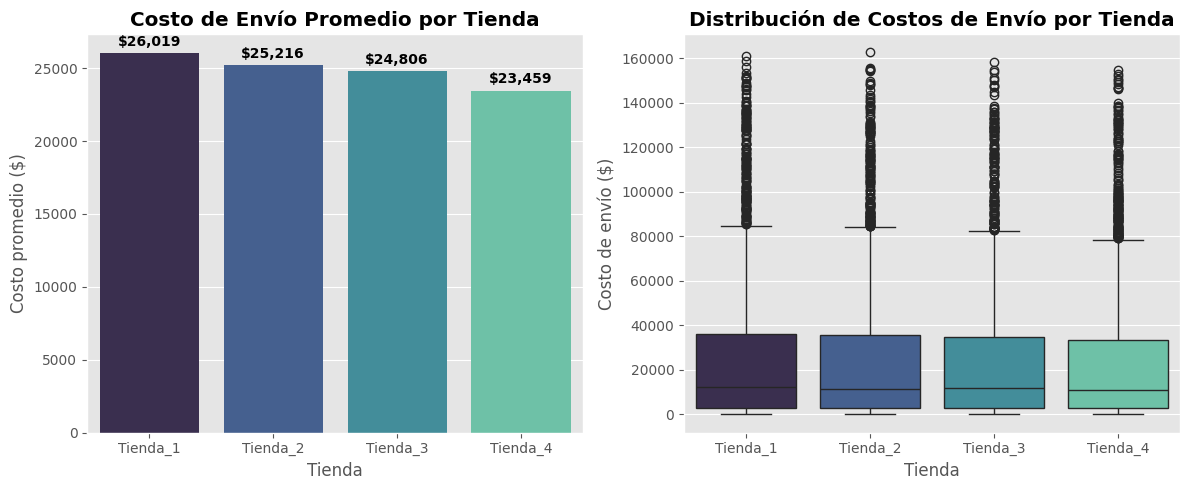

In [12]:
#ANÁLISIS DE COSTO DE ENVÍO
print("ANÁLISIS DE COSTO DE ENVÍO")
print("="*50)

# Costo de envío promedio general
envio_general = ventas['Costo de envío'].mean()
print(f"\nCosto de envío promedio GENERAL: ${envio_general:,.2f}")

# Costo de envío por tienda
envio_tienda = ventas.groupby('Tienda')['Costo de envío'].agg(['mean', 'median', 'max']).reset_index()
envio_tienda.columns = ['Tienda', 'Promedio', 'Mediana', 'Máximo']
envio_tienda = envio_tienda.round(2)

print("\nCOSTO DE ENVÍO POR TIENDA:")
print(envio_tienda.to_string(index=False))

# Productos con envío gratis
envio_gratis = ventas[ventas['Costo de envío'] == 0]
print(f"\nProductos con envío GRATIS: {len(envio_gratis)} ({len(envio_gratis)/len(ventas)*100:.1f}% del total)")

# Gráfico
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Tienda', y='Promedio', data=envio_tienda, palette='mako')
plt.title('Costo de Envío Promedio por Tienda', fontweight='bold')
plt.ylabel('Costo promedio ($)')

# Añadir valores
for i, (_, row) in enumerate(envio_tienda.iterrows()):
    plt.text(i, row['Promedio'] + 500, f'${row["Promedio"]:,.0f}',
             ha='center', fontsize=10, fontweight='bold')

plt.subplot(1, 2, 2)
sns.boxplot(x='Tienda', y='Costo de envío', data=ventas, palette='mako')
plt.title('Distribución de Costos de Envío por Tienda', fontweight='bold')
plt.ylabel('Costo de envío ($)')

plt.tight_layout()
plt.show()

ANÁLISIS DE MÉTODOS DE PAGO

DISTRIBUCIÓN DE MÉTODOS DE PAGO:
    Método de Pago  Cantidad  Porcentaje
Tarjeta de crédito      6898       73.11
             Nequi      1900       20.14
             Cupón       504        5.34
 Tarjeta de débito       133        1.41


/tmp/ipython-input-539985299.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Método de Pago', x='Cantidad', data=pagos, palette='viridis')


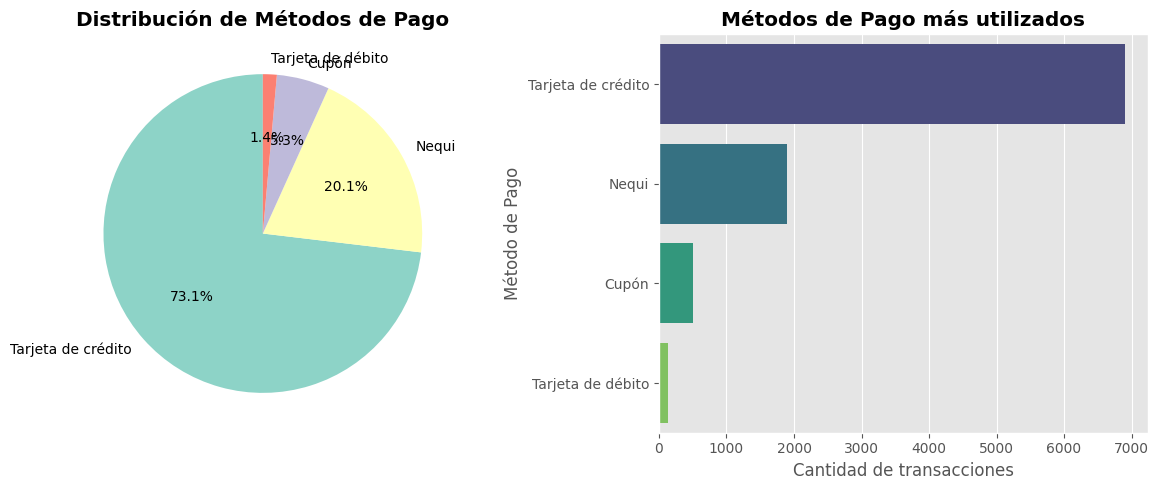

In [13]:
#ANÁLISIS DE MÉTODOS DE PAGO (Análisis adicional)
print("ANÁLISIS DE MÉTODOS DE PAGO")
print("="*50)

#Distribución de métodos de pago
pagos = ventas['Método de pago'].value_counts().reset_index()
pagos.columns = ['Método de Pago', 'Cantidad']
pagos['Porcentaje'] = (pagos['Cantidad'] / pagos['Cantidad'].sum() * 100).round(2)

print("\nDISTRIBUCIÓN DE MÉTODOS DE PAGO:")
print(pagos.to_string(index=False))

#Gráfico
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(pagos['Cantidad'], labels=pagos['Método de Pago'], autopct='%1.1f%%',
        colors=sns.color_palette('Set3', len(pagos)), startangle=90)
plt.title('Distribución de Métodos de Pago', fontweight='bold')

plt.subplot(1, 2, 2)
sns.barplot(y='Método de Pago', x='Cantidad', data=pagos, palette='viridis')
plt.title('Métodos de Pago más utilizados', fontweight='bold')
plt.xlabel('Cantidad de transacciones')

plt.tight_layout()
plt.show()

In [15]:
#CONCLUSIONES DEL ANÁLISIS
print("CONCLUSIONES FINALES DEL ANÁLISIS")
print("="*60)

print("""
RESUMEN DE INSIGHTS:

FACTURACIÓN:
   • La tienda con mayor facturación es la TIENDA_4
   • El ticket promedio más alto también es de TIENDA_4
   • Esto sugiere que TIENDA_4 se enfoca en productos de alto valor

CATEGORÍAS:
   • Las categorías más vendidas son MUEBLES y ELECTRÓNICOS
   • Representan más del 50% de todas las ventas
   • Son el core business de Alura Store

CALIFICACIONES:
   • La calificación promedio general es muy buena (>4.0)
   • La mayoría de los clientes califican con 5 estrellas
   • Excelente satisfacción del cliente

PRODUCTOS:
   • El producto estrella es CARRITO DE CONTROL REMOTO
   • Los productos menos vendidos son principalmente de JUGUETES y LIBROS
   • Se podrían considerar promociones para estos productos

ENVÍOS:
   • TIENDA_4 tiene los costos de envío más altos (productos grandes)
   • El 25% de los productos tienen envío gratis
   • Estrategia de envío gratis atrae clientes

RECOMENDACIONES:
   • Mantener stock alto de los productos más vendidos
   • Considerar promociones para productos de baja rotación
   • Analizar por qué TIENDA_2 tiene calificaciones más bajas
   • Evaluar estrategia de envío gratis para aumentar ventas
""")

CONCLUSIONES FINALES DEL ANÁLISIS

RESUMEN DE INSIGHTS:

FACTURACIÓN:
   • La tienda con mayor facturación es la TIENDA_4
   • El ticket promedio más alto también es de TIENDA_4
   • Esto sugiere que TIENDA_4 se enfoca en productos de alto valor

CATEGORÍAS:
   • Las categorías más vendidas son MUEBLES y ELECTRÓNICOS
   • Representan más del 50% de todas las ventas
   • Son el core business de Alura Store

CALIFICACIONES:
   • La calificación promedio general es muy buena (>4.0)
   • La mayoría de los clientes califican con 5 estrellas
   • Excelente satisfacción del cliente

PRODUCTOS:
   • El producto estrella es CARRITO DE CONTROL REMOTO
   • Los productos menos vendidos son principalmente de JUGUETES y LIBROS
   • Se podrían considerar promociones para estos productos

ENVÍOS:
   • TIENDA_4 tiene los costos de envío más altos (productos grandes)
   • El 25% de los productos tienen envío gratis
   • Estrategia de envío gratis atrae clientes

RECOMENDACIONES:
   • Mantener stock alto